In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow', 'utils'))

In [26]:
%matplotlib inline

from sessions import selected_009266, selected_008229, selected_009265, selected_57
from scipy import stats
from scipy import signal
from matplotlib.lines import Line2D
from sklearn import decomposition
from population import unit_activity_matrix
from spiketrain import get_shuffled
from events import get_event_periods
from psth import staple_pulsetrain, staple_spike_times
from neurosuite import get_unit_names_sorted

import matplotlib.pyplot as plt
import pyspike
import h5py
import numpy as np
import json
import itertools

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [34]:
source = '/home/sobolev/nevermind_ag-grothe/AG_Pecka/data/processed/'
source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'
rep_path = '/home/sobolev/nevermind/Andrey/analysis/manuscripts/'

nMAP_electrodes = {
    '008229': [1, 2, 3, 4, 5, 6, 7, 8],
    '009265': [1, 2],
    '009266': [1, 2],
    '57': [1],
    '60': [1, 2],
}

# manuscript session
# '009266_hippoSIT_2023-04-18_10-10-37'

all_selected = selected_009266 + selected_009265 + selected_57
all_selected = selected_008229
session = all_selected[0]
session

'008229_hippoSIT_2022-05-16_20-36-44'

In [35]:
animal    = session.split('_')[0]
s_path    = os.path.join(source, animal, session)
meta_file = os.path.join(s_path, 'meta.h5')
unit_file = os.path.join(s_path, 'units.h5')
electrodes = nMAP_electrodes[animal]

with h5py.File(meta_file, 'r') as f:
    cfg = json.loads(f['processed'].attrs['parameters'])

spike_times = {}
with h5py.File(unit_file, 'r') as f:
    unit_names = get_unit_names_sorted([name for name in f if int(name.split('-')[0]) in electrodes])
with h5py.File(unit_file, 'r') as f:
    for unit_name in unit_names:
        spike_times[unit_name]  = np.array(f[unit_name]['spike_times'])

In [36]:
spike_trains = []
for unit_name, spikes in spike_times.items():
    spike_train = pyspike.SpikeTrain(spikes, [0, cfg['experiment']['session_duration']])
    spike_trains.append(spike_train)

In [21]:
spike_profile = pyspike.spike_sync_profile(spike_trains[0], spike_trains[1])
x, y = spike_profile.get_plottable_data()

In [37]:
spike_sync = pyspike.spike_sync_matrix(spike_trains, interval=(0, cfg['experiment']['session_duration']))

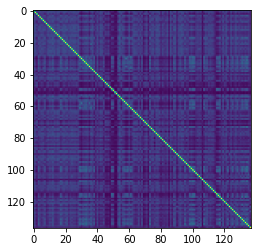

In [39]:
plt.imshow(spike_sync)

(array([8.480e+02, 1.836e+03, 2.378e+03, 2.886e+03, 3.180e+03, 3.196e+03,
        2.572e+03, 1.138e+03, 3.840e+02, 1.480e+02, 4.800e+01, 1.400e+01,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.370e+02]),
 array([0.00711417, 0.04021037, 0.07330656, 0.10640275, 0.13949895,
        0.17259514, 0.20569134, 0.23878753, 0.27188373, 0.30497992,
        0.33807611, 0.37117231, 0.4042685 , 0.4373647 , 0.47046089,
        0.50355709, 0.53665328, 0.56974947, 0.60284567, 0.63594186,
        0.66903806, 0.70213425, 0.73523045, 0.76832664, 0.80142283,
        0.83451903, 0.86761522, 0.90071142, 0.93380761, 0.96690381,
        1.        ]),
 <BarContainer object of 30 artists>)

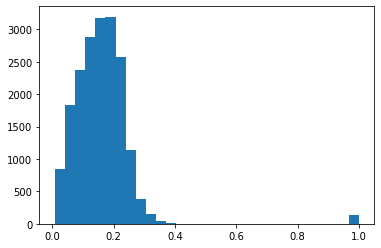

In [41]:
plt.hist(spike_sync.flatten(), bins=30)